### PYRAMIDAL NET

In [ ]:
!pip install tensorflow
!pip install keras_preprocessing
!pip install keras
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, AveragePooling2D
from sklearn.preprocessing import LabelEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Function to create DataFrame containing image paths and labels
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

# Function to extract features from images
def extract_features(images):
    features = []
    for image in images:
        img = load_img(image, grayscale=True, target_size=(48, 48))  # Resizing images to a consistent size
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features


# Define directories for train and test data
TRAIN_DIR = 'drive/MyDrive/images/train'
TEST_DIR = 'drive/MyDrive/images/test'


In [ ]:
import random

# Function to create DataFrame containing limited number of image paths and labels
def create_limited_dataframe(dir, max_images_per_label):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        label_images = [os.path.join(dir, label, imagename) for imagename in os.listdir(os.path.join(dir, label))]
        random.shuffle(label_images)  # Shuffle the images for randomness
        label_images = label_images[:max_images_per_label]  # Select a limited number of images per label
        image_paths.extend(label_images)
        labels.extend([label] * len(label_images))
        print(f"{label}: {len(label_images)} images completed")
    return image_paths, labels

# Define the maximum number of images per label
MAX_IMAGES_PER_LABEL = 1000

# Create limited DataFrames for train and test data
train = pd.DataFrame()
train['image'], train['label'] = create_limited_dataframe(TRAIN_DIR, MAX_IMAGES_PER_LABEL)

test = pd.DataFrame()
test['image'], test['label'] = create_limited_dataframe(TEST_DIR, MAX_IMAGES_PER_LABEL)

neutral: 1000 images completed
sad: 1000 images completed
happy: 1000 images completed
surprise: 1000 images completed
angry: 1000 images completed
angry: 960 images completed
happy: 1000 images completed
surprise: 797 images completed
neutral: 1000 images completed
sad: 1000 images completed


In [ ]:
# # Create DataFrames for train and test data
# train = pd.DataFrame()
# train['image'], train['label'] = createdataframe(TRAIN_DIR)

In [ ]:
# test = pd.DataFrame()
# test['image'], test['label'] = createdataframe(TEST_DIR)

In [ ]:

# Extract features for train and test data
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])


# Normalize features
x_train = train_features / 255.0
x_test = test_features / 255.0

# Encode labels
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)


/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [18]:
import pickle

# Define Pyramidal Net model architecture
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x=x_train, y=y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test))



pickle.dump(model,open('/content/drive/MyDrive/comparison_model_model/trained_model_pyramidal', 'wb'))



Epoch 1/50
40/40 [==============================] - 37s 906ms/step - loss: 1.6890 - accuracy: 0.2122 - val_loss: 1.6148 - val_accuracy: 0.2262
Epoch 2/50
40/40 [==============================] - 28s 704ms/step - loss: 1.6046 - accuracy: 0.2546 - val_loss: 1.5722 - val_accuracy: 0.2678
Epoch 3/50
40/40 [==============================] - 23s 568ms/step - loss: 1.5277 - accuracy: 0.3186 - val_loss: 1.4657 - val_accuracy: 0.3597
Epoch 4/50
40/40 [==============================] - 23s 569ms/step - loss: 1.4537 - accuracy: 0.3684 - val_loss: 1.4205 - val_accuracy: 0.3958
Epoch 5/50
40/40 [==============================] - 23s 581ms/step - loss: 1.3977 - accuracy: 0.3954 - val_loss: 1.3749 - val_accuracy: 0.4145
Epoch 6/50
40/40 [==============================] - 24s 593ms/step - loss: 1.3681 - accuracy: 0.4124 - val_loss: 1.3781 - val_accuracy: 0.4217
Epoch 7/50
40/40 [==============================] - 23s 577ms/step - loss: 1.3306 - accuracy: 0.4436 - val_loss: 1.3242 - val_accuracy: 0.4555

In [27]:
import random

# Function to create DataFrame containing limited number of image paths and labels
def create_limited_dataframe(dir, max_images_per_label):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        label_dir = os.path.join(dir, label)
        if os.path.isdir(label_dir):  # Check if it's a directory
            label_images = [os.path.join(label_dir, imagename) for imagename in os.listdir(label_dir)]
            random.shuffle(label_images)  # Shuffle the images for randomness
            label_images = label_images[:max_images_per_label]  # Select a limited number of images per label
            image_paths.extend(label_images)
            labels.extend([label] * len(label_images))
            print(f"{label}: {len(label_images)} images completed")
            # Print images folder-wise
            print("Images in", label_dir)
            for image in label_images:
                print(image)
            print()
    return image_paths, labels

# Define the maximum number of images per label
MAX_IMAGES_PER_LABEL = 1000

# Create limited DataFrames for train and test data
train = pd.DataFrame()
train['image'], train['label'] = create_limited_dataframe(TRAIN_DIR, MAX_IMAGES_PER_LABEL)

test = pd.DataFrame()
test['image'], test['label'] = create_limited_dataframe(TEST_DIR, MAX_IMAGES_PER_LABEL)


Streaming output truncated to the last 5000 lines.
drive/MyDrive/images/train/angry/43.jpg
drive/MyDrive/images/train/angry/35317.jpg
drive/MyDrive/images/train/angry/7241.jpg
drive/MyDrive/images/train/angry/26051.jpg
drive/MyDrive/images/train/angry/19502.jpg
drive/MyDrive/images/train/angry/35799.jpg
drive/MyDrive/images/train/angry/24638.jpg
drive/MyDrive/images/train/angry/28659.jpg
drive/MyDrive/images/train/angry/6929.jpg
drive/MyDrive/images/train/angry/17964.jpg
drive/MyDrive/images/train/angry/35560 (2).jpg
drive/MyDrive/images/train/angry/16560.jpg
drive/MyDrive/images/train/angry/2764.jpg
drive/MyDrive/images/train/angry/31343.jpg
drive/MyDrive/images/train/angry/23608.jpg
drive/MyDrive/images/train/angry/10359.jpg
drive/MyDrive/images/train/angry/22830.jpg
drive/MyDrive/images/train/angry/32433.jpg
drive/MyDrive/images/train/angry/34210.jpg
drive/MyDrive/images/train/angry/34383.jpg
drive/MyDrive/images/train/angry/34896 (1).jpg
drive/MyDrive/images/train/angry/25974.jpg
d

original image is of sad
1/1 [==============================] - 0s 32ms/step
model prediction is  sad


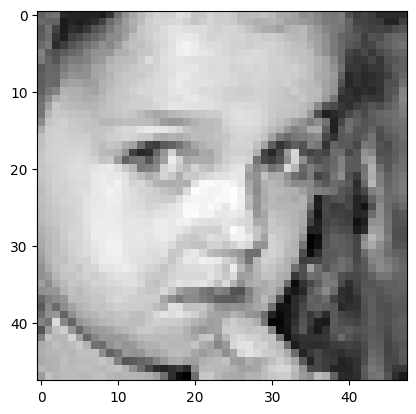

In [29]:
# Define labels
label = ['angry', 'happy', 'neutral', 'sad', 'surprise']

# Function to extract features from image
def ef(image):
    img = load_img(image, grayscale=True, target_size=(48, 48))  # Resizing images to a consistent size
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0


# Prediction and visualization
image = 'drive/MyDrive/images/test/sad/22977.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[np.argmax(pred)]
print("model prediction is ", pred_label)

# Display the image
plt.imshow(img.reshape(48, 48), cmap='gray')

original image is of neutral
1/1 [==============================] - 0s 22ms/step
model prediction is  neutral


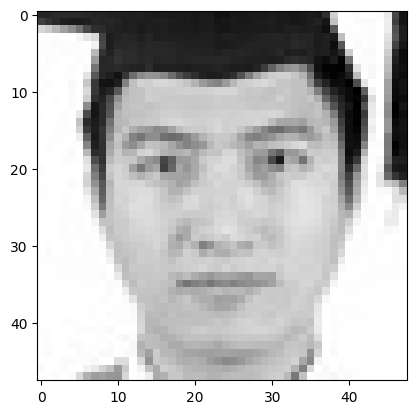

In [31]:
# Define labels
label = ['angry', 'happy', 'neutral', 'sad', 'surprise']

# Function to extract features from image
def ef(image):
    img = load_img(image, grayscale=True, target_size=(48, 48))  # Resizing images to a consistent size
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0


# Prediction and visualization
image = 'drive/MyDrive/images/test/neutral/34037.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[np.argmax(pred)]
print("model prediction is ", pred_label)

# Display the image
plt.imshow(img.reshape(48, 48), cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 34ms/step
model prediction is  surprise


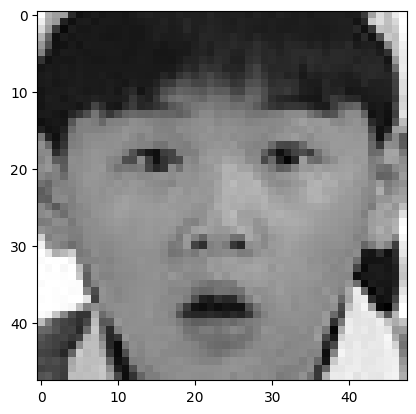

In [33]:
# Define labels
label = ['angry', 'happy', 'neutral', 'sad', 'surprise']

# Function to extract features from image
def ef(image):
    img = load_img(image, grayscale=True, target_size=(48, 48))  # Resizing images to a consistent size
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0


# Prediction and visualization
image = 'drive/MyDrive/images/test/surprise/14968.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[np.argmax(pred)]
print("model prediction is ", pred_label)

# Display the image
plt.imshow(img.reshape(48, 48), cmap='gray')